## ADS ASSIGNMENT 3

## Problem Statement: House Price Prediction

## ~ by Mylie Mudaliyar

### *Import libraries

In [1]:
import pandas as pd
import numpy as np

### 1. Download the dataset
### 2. Load the dataset into the tool.


In [2]:
df = pd.read_csv("C:\\Users\\mylie\\Dropbox\\PC\\Downloads\\Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


### 3. Perform Below Visualizations.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

- Univariate Analysis

<AxesSubplot:xlabel='price', ylabel='Count'>

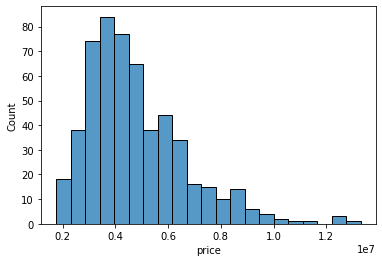

In [5]:
sns.histplot(df['price'])

c:\Users\mylie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='furnishingstatus', ylabel='count'>

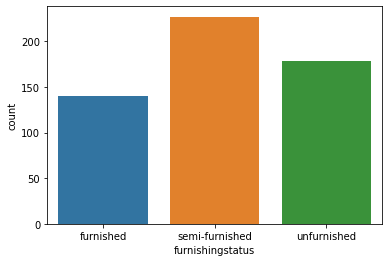

In [6]:
sns.countplot(df['furnishingstatus'])

- Bi-Variate Analysis


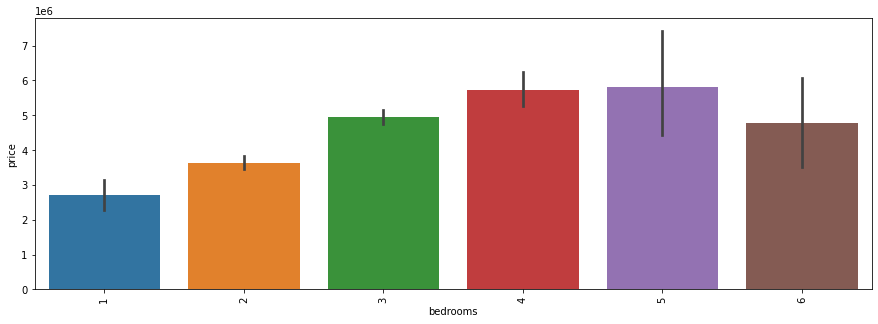

In [7]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['bedrooms'], y=df['price'])
plt.xticks(rotation='90')
plt.show()


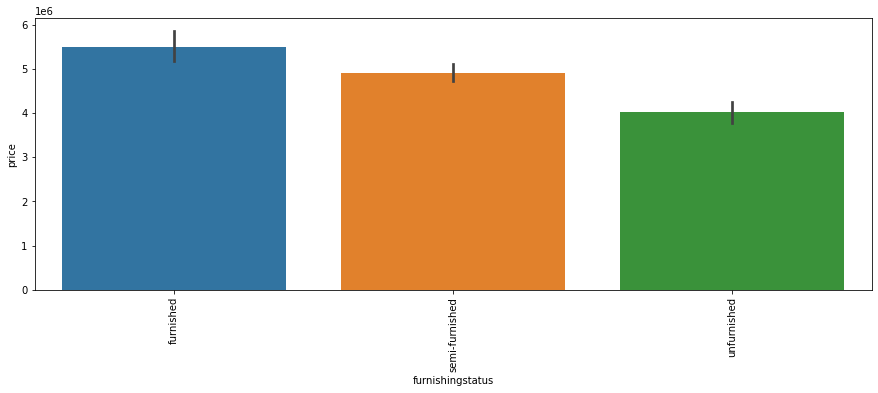

In [8]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['furnishingstatus'], y=df['price'])
plt.xticks(rotation='90')
plt.show()



<AxesSubplot:xlabel='area', ylabel='price'>

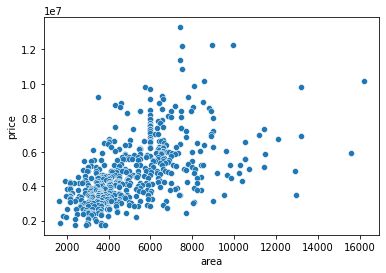

In [9]:
sns.scatterplot(x=df['area'],
                y=df['price'])

- Multi-Variate Analysis

<AxesSubplot:>

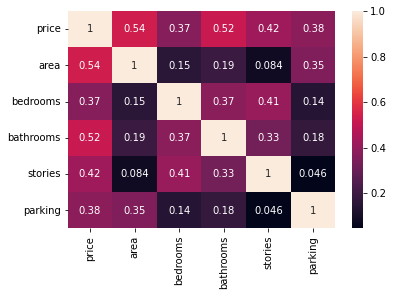

In [10]:
sns.heatmap(df.corr(), annot=True)

### 4. Perform descriptive statistics on the dataset.

In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


### 5. Check for Missing values and deal with them.

In [13]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

#### No missing values in any columns

### 6. Find the outliers and replace them outliers


In [14]:
# CHECKING FOR OUTLIERS IN AGE

# Using the Z-score method


# Select numerical columns for outlier detection
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Function to detect and replace outliers using Z-score method
def replace_outliers_zscore(df, column):
    # Calculate Z-score for the column
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    
    # Define threshold for outliers (e.g., Z-score > 3)
    threshold = 3
    
    # Replace outliers with median value
    df.loc[z_scores > threshold, column] = df[column].median()
    
    return df

# Replace outliers in each numerical column using Z-score method
for column in numeric_columns:
    df = replace_outliers_zscore(df, column)


df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.681894e+06,5033.231193,2.954128,1.244037,1.805505,0.693578
std,1.703666e+06,1930.206211,0.714674,0.429909,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.600000e+06,6325.000000,3.000000,1.000000,2.000000,1.000000
max,1.015000e+07,11460.000000,5.000000,2.000000,4.000000,3.000000


### 7. Check for Categorical columns and perform encoding.


In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')

In [16]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


df[categorical_columns]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus
0,1,0,0,0,1,0
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,0
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,2
541,0,0,0,0,0,1
542,1,0,0,0,0,2
543,0,0,0,0,0,0


### 8. Split the data into dependent and independent variables. 


In [17]:
# Independent variables (features)
X = df.drop('price', axis=1) 
print('Independent variables: ', X)

# Dependent variable (target)
y = df['price'] 
print('Dependent variable: ' , y)

Independent variables:       area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          1        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  furnishingstatus  
0                  0

### 9. Scale the independent variables


In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the independent variables
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[ 1.23767166  1.46476817  1.76004101 ...  1.4726183   1.51769249
  -1.40628573]
 [ 2.03624685  1.46476817 -0.56816858 ...  1.4726183   2.67940935
  -1.40628573]
 [ 2.55480217  0.06424422  1.76004101 ... -0.67906259  1.51769249
  -0.09166185]
 ...
 [-0.73283855 -1.33627974 -0.56816858 ... -0.67906259 -0.80574124
   1.22296203]
 [-1.10101283  0.06424422 -0.56816858 ... -0.67906259 -0.80574124
  -1.40628573]
 [-0.61357083  0.06424422 -0.56816858 ... -0.67906259 -0.80574124
   1.22296203]]


### 10. Split the data into training and testing


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print('Training Feature Set: ')
print(X_train)
print('Training Target Set: ')
print(y_train)

Training Feature Set: 
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
46   6000         3          2        4         1          0         0   
93   7200         3          2        1         1          0         1   
335  3816         2          1        1         1          0         1   
412  2610         3          1        2         1          0         1   
471  3750         3          1        2         1          0         0   
..    ...       ...        ...      ...       ...        ...       ...   
71   6000         4          2        4         1          0         0   
106  5450         4          2        1         1          0         1   
270  4500         3          2        3         1          0         0   
435  4040         2          1        1         1          0         0   
102  5500         3          2        4         1          1         0   

     hotwaterheating  airconditioning  parking  furnishingstatus  
46                 0 

### 11. Build the Model


In [21]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()


### 12. Train the Model


In [22]:
LinReg.fit(X_train, y_train)

LinearRegression()

### 13. Test the Model


In [23]:
y_predict = LinReg.predict(X_test)
y_predict

array([5172789.71542468, 6616199.84495555, 3307905.46657145,
       4722504.03116178, 3622608.91270267, 3958226.32024596,
       5673471.6538346 , 6023639.68503178, 2781351.14205899,
       2744571.75304821, 6767347.25571312, 3102277.09321676,
       3137309.71944518, 3394529.35826977, 3995567.93602049,
       3275144.27303633, 3162569.57287226, 4922173.52358152,
       4595374.75044619, 3800460.42698035, 5283186.60687799,
       5462429.952579  , 3030655.58111649, 4367719.73081261,
       5264882.3957425 , 6905005.62025483, 3538797.18721173,
       5367728.08478089, 5416788.11467117, 3592863.3210257 ,
       5802730.44999688, 3548213.02474461, 6778065.32972697,
       4478152.99509935, 3992581.79721865, 5719765.68800309,
       4886668.87019191, 4603061.935152  , 3232814.40045533,
       4821397.67044197, 4708571.2679492 , 3676087.08494045,
       6596095.56085723, 4177601.25392079, 3988938.09040212,
       4370132.73107703, 6678881.22322465, 4265002.15284227,
       4136642.51007544,

In [24]:
#Actual price value from test dataset
y_test


316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

### 14. Measure the performance using Metrics

In [25]:
#Using R-Square
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error:', r_square)


R-Square Error: 0.5279108041339723


In [26]:
#Using Adjusted R-Square.
# Here n = no. of observations and p = no. of independent variables
n = 50
p = 2
Adj_r_square = 1-(1-r_square)*(n-1)/(n-p-1)
print('Adjusted R-Square Error:', Adj_r_square)


Adjusted R-Square Error: 0.5078219021822264
